# HW8

# Student Name: Hung Yi-Le

# GITHUB: ZackLa

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1. Supervised, Semi-Supervised, and Unsupervised Learning (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [2]:
d = pd.read_csv('../data/wdbc.data', header = None)

In [3]:
d

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
d1 = d[[0,1]]
d1 = d1.rename(columns = {0: "ID number", 1: "Diagnosis"})

In [5]:
d = d.drop(columns = [0,1])
## reset the index
d.columns = range(1, d.shape[1]+1)

In [6]:
scaler = MinMaxScaler()
scaler.fit(d)

MinMaxScaler()

In [7]:
d = pd.DataFrame(scaler.transform(d))
d.columns = range(1, d.shape[1]+1)

In [8]:
d

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [9]:
df = pd.concat([d1, d], axis = 1)

In [10]:
df0 = df.copy()

In [11]:
df

,ID number,Diagnosis,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,30
0,842302,M,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,842517,M,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,84300903,M,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,84348301,M,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,84358402,M,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,926682,M,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,926954,M,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,927241,M,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


# (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm. 

## i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [12]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [13]:
negative = df.loc[df['Diagnosis'] == 'B']
positive = df.loc[df['Diagnosis'] == 'M']
#
#negative = negative.sample(frac=0.2, axis = 'rows', random_state = 42)
#positive = positive.sample(frac=0.2, axis = 'rows', random_state = 42)

## select test set
#test = pd.concat([positive, negative])
#train = pd.concat([df, test, test]).drop_duplicates(keep = False)
#positive.sample(frac=0.2, axis = 'rows')

In [14]:
accuracy_train = []
precision_train = []
recall_train = []
f1_score_train = []
auc_train = []

accuracy_test = []
precision_test = []
recall_test = []
f1_score_test = []
auc_test = []

r = []

for i in list(range(1,31,1)):
    negative = df.loc[df['Diagnosis'] == 'B']
    positive = df.loc[df['Diagnosis'] == 'M']

    negative = negative.sample(frac=0.2, axis = 'rows', random_state = i)
    positive = positive.sample(frac=0.2, axis = 'rows', random_state = i)

    ## select test set
    test = pd.concat([positive, negative])
    train = pd.concat([df, test, test]).drop_duplicates(keep = False)

    y_test = test['Diagnosis']
    y_train = train['Diagnosis']
    x_test = test.loc[:,1:]
    x_train = train.loc[:,1:]

    y_test = y_test.replace(["B", "M"], [0, 1])
    y_train = y_train.replace(["B", "M"], [0, 1])

    model = svm.LinearSVC(penalty = 'l1', dual = False, max_iter = 300000)
    parameters = {'C': [0.01, 0.1, 10, 100, 1000, 10000]}
    clf = GridSearchCV(model, parameters, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 5))
    
    # for test set
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    #for AUC (test)
    y_score = clf.decision_function(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_score)
    auc1 = auc(fpr, tpr)

    accuracy_test.append(clf.score(x_test, y_test))
    precision_test.append(precision_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    f1_score_test.append(f1_score(y_test, y_pred))
    auc_test.append(auc1)
    
    #for train set
    y_pred00 = clf.predict(x_train)
    #for AUC (train)
    y_score = clf.decision_function(x_train)
    fpr1, tpr1, thresholds1 = roc_curve(y_train, y_score)
    auc2 = auc(fpr1, tpr1)
    
    accuracy_train.append(clf.score(x_train, y_train))
    precision_train.append(precision_score(y_train, y_pred00))
    recall_train.append(recall_score(y_train, y_pred00))
    f1_score_train.append(f1_score(y_train, y_pred00))
    auc_train.append(auc2)
    r.append(i)

(0.0, 1.1)

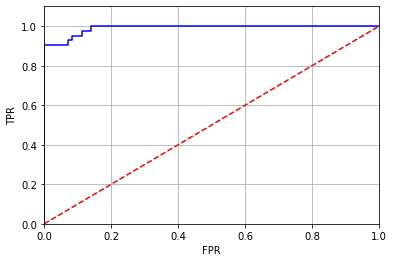

In [15]:
#ROC for test set
plt.plot(fpr, tpr, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1.1)

### The ROC graph for test set is shown as above

In [22]:
df_confusion = pd.DataFrame(confusion_matrix(y_pred, y_test))
df_confusion = df_confusion.rename_axis(index = 'True', columns = 'Predicted')
df_confusion

Predicted,0,1
True,,
0,70,4
1,1,38


### The confusion marix for test set data is shown as above

(0.0, 1.1)

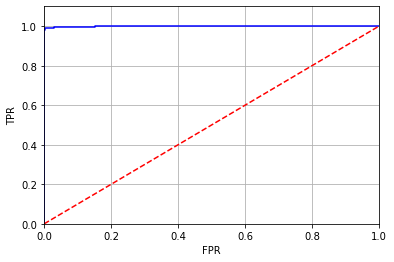

In [23]:
#ROC for train set
plt.plot(fpr1, tpr1, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1.1)

### The ROC graph for train set is shown as above

In [24]:
df_confusion1 = pd.DataFrame(confusion_matrix(y_pred00, y_train))
df_confusion1 = df_confusion1.rename_axis(index = 'True', columns = 'Predicted')
df_confusion1

Predicted,0,1
True,,
0,286,3
1,0,167


### The confusion marix for train set data is shown as above

In [26]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
#dataframe for test 
df1 = df1.assign(random_state = r, Avg_Acc_Test = accuracy_test, Precision_Test = precision_test,\
                Recall_Test = recall_test, F1_score_Test = f1_score_test, AUC_Test = auc_test)
#dataframe for trainf
df2 = df2.assign(random_state = r, Avg_Acc_Train = accuracy_train, Precision_Train = precision_train,\
                Recall_Train = recall_train, F1_score_Train = f1_score_train, AUC_Train = auc_train)

In [27]:
df2.mean()

random_state       15.500000
Avg_Acc_Train       0.990132
Precision_Train     0.994240
Recall_Train        0.979216
F1_score_Train      0.986661
AUC_Train           0.998915
dtype: float64

### The average accuracy for train set is about 0.990132, precision is about 0.994240, recall is about 0.979216, F1 score is about 0.986661, and AUC is about 0.998915

In [28]:
df1.mean()

random_state      15.500000
Avg_Acc_Test       0.966077
Precision_Test     0.962238
Recall_Test        0.946825
F1_score_Test      0.953890
AUC_Test           0.989850
dtype: float64

### The average accuracy for train set is about 0.966667, precision is about 0.962238, recall is about 0.946825, F1 score is about 0.953890, and AUC is about 0.989850

## ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.
## A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.


In [29]:
best_para = []
distance = []
for i in list(range(1,31,1)):
    negative = df.loc[df['Diagnosis'] == 'B']
    positive = df.loc[df['Diagnosis'] == 'M']

    negative = negative.sample(frac=0.2, axis = 'rows', random_state = i)
    positive = positive.sample(frac=0.2, axis = 'rows', random_state = i)

    test = pd.concat([positive, negative])
    train = df.drop(test.index)

    negative1 = train.loc[train['Diagnosis'] == 'B']
    positive1 = train.loc[train['Diagnosis'] == 'M']

    negative1 = negative1.sample(frac=0.5, axis = 'rows', random_state = i)
    positive1 = positive1.sample(frac=0.5, axis = 'rows', random_state = i)

    labeled = pd.concat([positive1, negative1])
    unlabeled = train.drop(labeled.index)

    y_unlabel = unlabeled['Diagnosis']
    y_label = labeled['Diagnosis']
    x_unlabel = unlabeled.loc[:,1:]
    x_label = labeled.loc[:,1:]

    model1 = svm.LinearSVC(penalty = 'l1', dual = False, max_iter = 300000)
    parameters1 = {'C': [0.01, 0.1, 10, 100, 1000, 10000, 100000]}
    clf1 = GridSearchCV(model1, parameters1, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 5))
    clf1.fit(x_label, y_label)
    
    distance.append(clf1.decision_function(x_unlabel))
    best_para.append(clf1.best_params_['C'])

In [30]:
df3 = pd.DataFrame()
df3 = df3.assign(random_state = r, Best_para = best_para)

In [31]:
df3

,random_state,Best_para
0,1,10000.0
1,2,10.0
2,3,100.0
3,4,10.0
4,5,100000.0
5,6,10.0
6,7,1000.0
7,8,10.0
8,9,0.1
9,10,1000.0


### The dataframe shown as above tells us the best penalty parameter in each runs

## B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.


In [32]:
best_para = []
distance = []

accuracy_train1 = []
precision_train1 = []
recall_train1 = []
f1_score_train1 = []
auc_train1 = []

accuracy_test1 = []
precision_test1 = []
recall_test1 = []
f1_score_test1 = []
auc_test1 = []

r = []
for i in list(range(1,31,1)):
    df = df.replace(["B", "M"], [0, 1])
    
    negative = df.loc[df['Diagnosis'] == 0]
    positive = df.loc[df['Diagnosis'] == 1]

    negative = negative.sample(frac=0.2, axis = 'rows', random_state = i)
    positive = positive.sample(frac=0.2, axis = 'rows', random_state = i)

    test = pd.concat([positive, negative])
    train = df.drop(test.index)
    
    y_test = test['Diagnosis']
    y_train = train['Diagnosis']
    x_test = test.loc[:,1:]
    x_train = train.loc[:,1:]

    negative1 = train.loc[train['Diagnosis'] == 0]
    positive1 = train.loc[train['Diagnosis'] == 1]

    negative1 = negative1.sample(frac=0.5, axis = 'rows', random_state = i)
    positive1 = positive1.sample(frac=0.5, axis = 'rows', random_state = i)
    
    labeled = pd.concat([positive1, negative1])
    unlabeled = train.drop(labeled.index)

    y_unlabel = unlabeled['Diagnosis']
    y_label = labeled['Diagnosis']
    x_unlabel = unlabeled.loc[:,1:]
    x_label = labeled.loc[:,1:]


    model1 = svm.LinearSVC(C = df3['Best_para'][i-1], penalty = 'l1', dual = False, max_iter = 300000)
#    parameters1 = np.array(df3['Best_para'][i])
#    clf2 = GridSearchCV(model1, parameters1, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 5))
    
    for t in (x_unlabel.index):
        model1.fit(x_label, y_label)
        l = abs(np.argmax(model1.decision_function(x_unlabel)))
        x_unlabel = x_unlabel.drop(x_unlabel.iloc[l:l+1].index)
        labeled = pd.concat([labeled,x_unlabel.iloc[l:l+1]])
    
    
    model1.fit(x_train, y_train)
    y_pred1 = model1.predict(x_test)
    
    #for AUC (test)
    y_score1 = model1.decision_function(x_test)
    fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score1)
    auc3 = auc(fpr2, tpr2)

    accuracy_test1.append(model1.score(x_test, y_test))
    precision_test1.append(precision_score(y_test, y_pred1))
    recall_test1.append(recall_score(y_test, y_pred1))
    f1_score_test1.append(f1_score(y_test, y_pred1))
    auc_test1.append(auc3)
    
    #for train set
    y_pred2 = model1.predict(x_train)
    #for AUC (train)
    y_score2 = model1.decision_function(x_train)
    fpr3, tpr3, thresholds3 = roc_curve(y_train, y_score2)
    auc4 = auc(fpr3, tpr3)
    
#     #for train set
#     y_pred2 = model1.predict(x_train)
#     #for AUC (train)
#     y_score2 = model1.decision_function(x_train)
#     fpr3, tpr3, thresholds3 = roc_curve(y_train, y_score2)
#     auc4 = auc(fpr3, tpr3)
    
    
    accuracy_train1.append(model1.score(x_train, y_train))
    precision_train1.append(precision_score(y_train, y_pred2))
    recall_train1.append(recall_score(y_train, y_pred2))
    f1_score_train1.append(f1_score(y_train, y_pred2))
    auc_train1.append(auc4)
    r.append(i)

(0.0, 1.1)

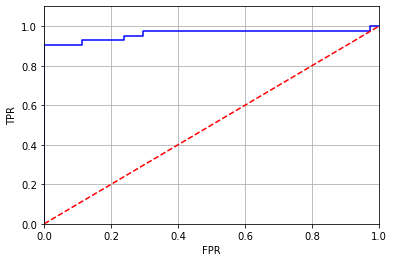

In [33]:
# ROC graph for train set
plt.plot(fpr2, tpr2, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1.1)

### The ROC graph for test set is shown as above

In [34]:
df_confusion2 = pd.DataFrame(confusion_matrix(y_pred1, y_test))
df_confusion2 = df_confusion2.rename_axis(index = 'True', columns = 'Predicted')
df_confusion2

Predicted,0,1
True,,
0,70,4
1,1,38


### The confusion marix for test set data is shown as above

(0.0, 1.1)

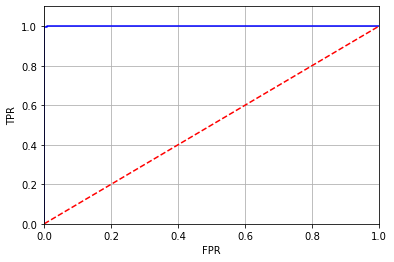

In [35]:
# ROC graph for train set
plt.plot(fpr3, tpr3, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1.1)

### The ROC graph for train set is shown as above

In [36]:
df_confusion3 = pd.DataFrame(confusion_matrix(y_pred2, y_train))
df_confusion3 = df_confusion3.rename_axis(index = 'True', columns = 'Predicted')
df_confusion3

Predicted,0,1
True,,
0,286,2
1,0,168


### The confusion marix for train set data is shown as above

In [37]:
df4 = pd.DataFrame()
df5 = pd.DataFrame()
#dataframe for test 
df4 = df4.assign(random_state = r, Avg_Acc_Test = accuracy_test1, Precision_Test = precision_test1,\
                Recall_Test = recall_test1, F1_score_Test = f1_score_test1, AUC_Test = auc_test1)
#dataframe for trainf
df5 = df5.assign(random_state = r, Avg_Acc_Train = accuracy_train1, Precision_Train = precision_train1,\
                Recall_Train = recall_train1, F1_score_Train = f1_score_train1, AUC_Train = auc_train1)

In [38]:
df4.mean()

random_state      15.500000
Avg_Acc_Test       0.958997
Precision_Test     0.951652
Recall_Test        0.938889
F1_score_Test      0.944183
AUC_Test           0.984630
dtype: float64

### The average accuracy for test set is about 0.958997, precision is about 0.951652, recall is about 0.938889, F1 score is about 0.944183, and AUC is about 0.984630

In [39]:
df5.mean()

random_state       15.500000
Avg_Acc_Train       0.992836
Precision_Train     0.996408
Recall_Train        0.984314
F1_score_Train      0.990261
AUC_Train           0.999026
dtype: float64

### The average accuracy for train set is about 0.992836, precision is about 0.996408, recall is about 0.984314, F1 score is about 0.990261, and AUC is about 0.999026

## iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2. 
## A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?


## B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.1

In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score
from scipy.special import softmax

In [50]:
accuracy_label_train = []
precision_label_train = []
recall_label_train = []
f1_score_label_train = []
auc_label_train = []
r = []

accuracy_label = []
precision_label = []
recall_label = []
f1_score_label = []
auc_label = []

for i in list(range(1,31,1)):

    negative = df.loc[df['Diagnosis'] == 0]
    positive = df.loc[df['Diagnosis'] == 1]

    negative = negative.sample(frac=0.2, axis = 'rows', random_state = i)
    positive = positive.sample(frac=0.2, axis = 'rows', random_state = i)

    test = pd.concat([positive, negative])
    train = df.drop(test.index)

    y_test = test['Diagnosis']
    y_train = train['Diagnosis']
    x_test = test.loc[:,1:]
    x_train = train.loc[:,1:]

    km = KMeans(n_clusters = 2, init = 'random').fit(x_train)

    nbrs = NearestNeighbors(n_neighbors = 30, algorithm = 'ball_tree').fit(x_train)
    distance, indices = nbrs.kneighbors([km.cluster_centers_[0], km.cluster_centers_[1]])
    
    nbrs1 = NearestNeighbors(n_neighbors = len(x_train), algorithm = 'ball_tree').fit(x_train)
    distance1, indices1 = nbrs1.kneighbors([km.cluster_centers_[0], km.cluster_centers_[1]])
    
    x_train['klabel'] = km.labels_
    condition = [(x_train['klabel'] == 0), (x_train['klabel'] == 1 )]
    value = [y_train.iloc[indices[0]].mode()[0], y_train.iloc[indices[1]].mode()[0]]
    x_train['label'] = np.select(condition, value)

    #for AUC (train)
    dc0 = 1 - softmax(distance1[0])
    dc1 = 1 - softmax(distance1[1])
    dc2 = dc0/(dc0+dc1)
    df10 = pd.DataFrame()
    df10 = df10.assign(DC0 = dc0, DC1 = dc1, D_to_c0 = dc2)
    df10['label'] = km.labels_
    df10['klabel'] = np.select(condition, value)
    
    condition1 = [(df10['label'] == df10['klabel']), (df10['label'] != df10['klabel'])]
    value1 = [dc1, dc0]
    df10['D_to_t1'] = np.select(condition1, value1)
    y_pred5 = km.labels_
    
    fpr4, tpr4, thresholds4 = roc_curve(y_train, df10['D_to_t1'])
    auc5 = auc(fpr4, tpr4)
    
    accuracy_label_train.append(accuracy_score(y_train, x_train['label']))
    precision_label_train.append(precision_score(y_train, x_train['label']))
    recall_label_train.append(recall_score(y_train, x_train['label']))
    f1_score_label_train.append(f1_score(y_train, x_train['label']))
    auc_label_train.append(auc5)
    r.append(i)
    
    x_train = x_train.drop(columns = ['klabel', 'label'])
    
    #for Test
    km = KMeans(n_clusters = 2, init = 'random').fit(x_train)

    nbrs = NearestNeighbors(n_neighbors = 30, algorithm = 'ball_tree').fit(x_test)
    distance, indices = nbrs.kneighbors([km.cluster_centers_[0], km.cluster_centers_[1]])
    
    nbrs1 = NearestNeighbors(n_neighbors = len(x_test), algorithm = 'ball_tree').fit(x_test)
    distance1, indices1 = nbrs1.kneighbors([km.cluster_centers_[0], km.cluster_centers_[1]])
    
    temp = km.predict(x_test)
    x_test['klabel'] = temp
    condition = [(x_test['klabel'] == 0), (x_test['klabel'] == 1 )]
    value = [y_test.iloc[indices[0]].mode()[0], y_test.iloc[indices[1]].mode()[0]]
    x_test['label'] = np.select(condition, value)
    y_pred6 = temp

    #for AUC (test)
    dc0 = 1 - softmax(distance1[0])
    dc1 = 1 - softmax(distance1[1])
    dc2 = dc0/(dc0+dc1)
    df10 = pd.DataFrame()
    df10 = df10.assign(DC0 = dc0, DC1 = dc1, D_to_c0 = dc2, label = temp, klabel = np.select(condition, value))
    
    condition1 = [(df10['label'] == df10['klabel']), (df10['label'] != df10['klabel'])]
    value1 = [dc1, dc0]
    df10['D_to_t1'] = np.select(condition1, value1)
    
    fpr5, tpr5, thresholds5 = roc_curve(y_test, df10['D_to_t1'])
    auc6 = auc(fpr5, tpr5)

    accuracy_label.append(accuracy_score(y_test, x_test['label']))
    precision_label.append(precision_score(y_test, x_test['label']))
    recall_label.append(recall_score(y_test, x_test['label']))
    f1_score_label.append(f1_score(y_test, x_test['label']))
    auc_label.append(auc6)

(0.0, 1.1)

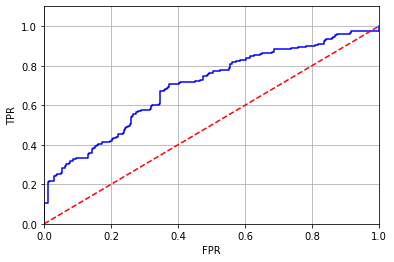

In [51]:
# ROC for train
plt.plot(fpr4, tpr4, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1.1)

### The ROC graph for my train set is shown as above

In [52]:
df_confusion4 = pd.DataFrame(confusion_matrix(y_pred5, y_train))
df_confusion4 = df_confusion4.rename_axis(index = 'True', columns = 'Predicted')
df_confusion4

Predicted,0,1
True,,
0,278,27
1,8,143


### The confusion marix for train set data is shown as above

(0.0, 1.1)

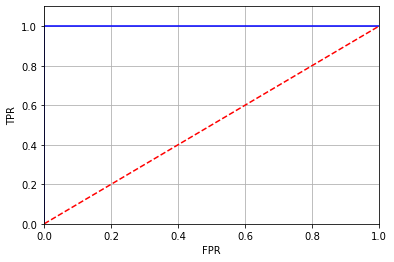

In [53]:
#ROC for test
plt.plot(fpr5, tpr5, color = "Blue")
plt.plot([0,1],[0,1], color = 'Red', linestyle = "--")
plt.grid()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(0,1)
plt.ylim(0,1.1)

### The ROC graph for my test set is shown as above

In [54]:
df_confusion5 = pd.DataFrame(confusion_matrix(y_pred6, y_test))
df_confusion5 = df_confusion5.rename_axis(index = 'True', columns = 'Predicted')
df_confusion5

Predicted,0,1
True,,
0,3,37
1,68,5


### The confusion marix for test set data is shown as above

In [56]:
df6 = pd.DataFrame()
df11 = pd.DataFrame()

#dataframe for label
df6 = df6.assign(random_state = r, Avg_Acc_train = accuracy_label_train, Precision_train = precision_label_train,\
                Recall_train = recall_label_train, F1_score_train = f1_score_label_train, auc_train = auc_label_train)

df11 = df11.assign(random_state = r, Avg_Acc_test = accuracy_label, Precision_test = precision_label,\
                Recall_test = recall_label, F1_score_test = f1_score_label, auc_test = auc_label)

In [57]:
df6.mean()

random_state       15.500000
Avg_Acc_train       0.929094
Precision_train     0.956228
Recall_train        0.848824
F1_score_train      0.899231
auc_train           0.673455
dtype: float64

### The average accuracy for train set is about 0.929094, precision is about 0.956228, recall is about 0.848824, F1 score is about 0.899231, and AUC is about 0.673455

In [58]:
df11.mean()

random_state      15.500000
Avg_Acc_test       0.926254
Precision_test     0.950513
Recall_test        0.846032
F1_score_test      0.894373
auc_test           1.000000
dtype: float64

### The average accuracy for test set is about 0.926254, precision is about 0.950513, recall is about 0.846032, F1 score is about 0.894373, and AUC is about 1

## C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

## iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit  predict method.

In [59]:
from sklearn.cluster import SpectralClustering
import statistics

In [60]:
accuracy_label2 = []
precision_label2 = []
recall_label2 = []
f1_score_label2 = []
auc_label2 = []
r = []

accuracy_label_train2 = []
precision_label_train2 = []
recall_label_train2 = []
f1_score_label_train2 = []
auc_label_train2 = []

threshold = [0, 0.001, 0.2, 0.4, 0.6, 0.8, 1]

for i in list(range(1,31,1)):
    negative = df.loc[df['Diagnosis'] == 0]
    positive = df.loc[df['Diagnosis'] == 1]

    negative = negative.sample(frac=0.2, axis = 'rows', random_state = i)
    positive = positive.sample(frac=0.2, axis = 'rows', random_state = i)

    test = pd.concat([positive, negative])
    train = df.drop(test.index)

    y_test = test['Diagnosis']
    y_train = train['Diagnosis']
    x_test = test.loc[:,1:]
    x_train = train.loc[:,1:]

    spec = SpectralClustering(n_clusters = 2, gamma = 1, assign_labels = 'discretize', affinity = 'rbf').fit(x_train)

    y_pred3 = spec.fit_predict(x_test)
    y_pred4 = spec.fit_predict(x_train)
    
    df001 = pd.DataFrame(y_test.tolist(), columns = ['Diagnosis'])
    df002 = pd.DataFrame(y_pred3.tolist(), columns = ['Diagnosis_1'])
    df001 = pd.concat([df001,df002], axis = 1)
    
    df010 = df001.groupby(['Diagnosis_1'])[['Diagnosis']].agg(lambda x:x.value_counts().index[0])
    
    x_test['true_label'] = y_pred3
    condition = [(x_test['true_label'] == 0), (x_test['true_label'] == 1 )]
    value = [df010['Diagnosis'][0], df010['Diagnosis'][1]]
    x_test['label'] = np.select(condition, value)
    
    n1 = len(x_test[x_test.label == 1])
    n0 = len(x_test[x_test.label == 0])
    

    accuracy_label2.append(accuracy_score(y_test, x_test['label']))
    precision_label2.append(precision_score(y_test, x_test['label']))
    recall_label2.append(recall_score(y_test, x_test['label']))
    f1_score_label2.append(f1_score(y_test, x_test['label']))
    r.append(i)
    
    
    df001 = pd.DataFrame(y_train.tolist(), columns = ['Diagnosis'])
    df002 = pd.DataFrame(y_pred4.tolist(), columns = ['Diagnosis_1'])
    df001 = pd.concat([df001,df002], axis = 1)
    
    df010 = df001.groupby(['Diagnosis_1'])[['Diagnosis']].agg(lambda x:x.value_counts().index[0])
    
    x_train['true_label'] = y_pred4
    condition = [(x_train['true_label'] == 0), (x_train['true_label'] == 1 )]
    value = [df010['Diagnosis'][0], df010['Diagnosis'][1]]
    x_train['label'] = np.select(condition, value)
    
    
    accuracy_label_train2.append(accuracy_score(y_train, x_train['label']))
    precision_label_train2.append(precision_score(y_train, x_train['label']))
    recall_label_train2.append(recall_score(y_train, x_train['label']))
    f1_score_label_train2.append(f1_score(y_train, x_train['label']))

In [61]:
df7 = pd.DataFrame()
df9 = pd.DataFrame()

#dataframe for label
df7 = df7.assign(random_state = r, Avg_Acc_Test = accuracy_label2, Precision_Test = precision_label2,\
                Recall_Test = recall_label2, F1_score_Test = f1_score_label2)

#dataframe for label
df9 = df9.assign(random_state = r, Avg_Acc_train = accuracy_label_train2, Precision_train = precision_label_train2,\
                Recall_train = recall_label_train2, F1_score_train = f1_score_label_train2)

In [62]:
df_confusion6 = pd.DataFrame(confusion_matrix(y_pred3, y_test))
df_confusion6 = df_confusion6.rename_axis(index = 'True', columns = 'Predicted')
df_confusion6

Predicted,0,1
True,,
0,0,24
1,71,18


### The confusion marix for test set data is shown as above

In [63]:
df_confusion7 = pd.DataFrame(confusion_matrix(y_pred4, y_train))
df_confusion7 = df_confusion7.rename_axis(index = 'True', columns = 'Predicted')
df_confusion7

Predicted,0,1
True,,
0,283,36
1,3,134


### The confusion marix for train set data is shown as above

In [64]:
df7.mean()

random_state      15.500000
Avg_Acc_Test       0.904425
Precision_Test     0.968320
Recall_Test        0.771429
F1_score_Test      0.842844
dtype: float64

### The average accuracy for test set is about 0.904425, precision is about 0.968320, recall is about 0.771429, F1 score is about 0.842844, and AUC is about __________

In [65]:
df9.mean()

random_state       15.500000
Avg_Acc_train       0.918275
Precision_train     0.982398
Recall_train        0.795098
F1_score_train      0.878667
dtype: float64

### The average accuracy for train set is about 0.918275, precision is about 0.982398, recall is about 0.795098, F1 score is about 0.878667, and AUC is about ______

## v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

### Compares to all average accuracy for test set, my semi-supervised learning gives me the highest avg accuracy score. As well as for to all the average accuracy for my train set, my semi-supervised leanring gives me the highest avg accuracy score.

# 2. Active Learning Using Support Vector Machines
## (a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [66]:
import random

In [67]:
with open('../data/data_banknote_authentication.txt', "r") as fp:
    f = fp.readlines()[0:1372]

In [68]:
data = []
for i in range(0,len(f),1):
    data.append(f[i].split(","))
    
#remover the \n
for i, s in enumerate(data):
    data[i] = list(map(lambda x:x.strip(), s))
    
df8 = pd.DataFrame(data)

## (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.
## i. Traina SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.


In [69]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [70]:
len(x_train)

456

In [71]:
import warnings 
warnings.filterwarnings("ignore")

x = df8.iloc[:,:4]
y = df8.iloc[:,4:]
df111 = pd.DataFrame()

for i in list(range(1,51,1)):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 472/1372, random_state = 1, stratify = y)
    
    x_train2_2 = pd.DataFrame()
    y_train2_2 = pd.DataFrame()
    score = []
    test_error = []
    params = []
    validation = []
    for k in list(range(1,91,1)):
        

        if k <= 89:
            
            x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, \
                                                                    test_size = (len(x_train)-10)/len(x_train), \
                                                                    random_state = i, stratify = y_train)

            x_train = x_train.drop(x_train2.index)
            y_train = y_train.drop(y_train2.index)
            x_train2_2 = pd.concat([x_train2_2,x_train2])
            y_train2_2 = pd.concat([y_train2_2,y_train2])


            model = svm.LinearSVC(penalty = 'l1', dual = False, max_iter = 500000, tol = 0.5)
            parameters = {'C':[0.01, 10, 100, 1000, 10000]}
            clf = GridSearchCV(model, parameters, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 5))
            clf.fit(x_train2_2, np.ravel(y_train2_2))


            validation.append(clf.best_score_)
            test_error.append(1 - clf.score(x_test, np.ravel(y_test)))
            params.append(clf.best_params_['C'])
            
        else:
            clf.fit(x_train, np.ravel(y_train))

            validation.append(clf.best_score_)
            test_error.append(1 - clf.score(x_test, np.ravel(y_test)))
            params.append(clf.best_params_['C'])
                
                         
    
    df111['c_' + str(i)] = params
    df111['Test_error' + str(i)] = test_error
    df111['Validation' + str(i)] = validation

In [72]:
df111

,c_1,Test_error1,Validation1,c_2,Test_error2,Validation2,c_3,Test_error3,Validation3,c_4,...,Validation47,c_48,Test_error48,Validation48,c_49,Test_error49,Validation49,c_50,Test_error50,Validation50
0,10,0.048729,0.900000,100,0.266949,0.900000,10,0.161017,0.900000,10,...,1.000000,10,0.016949,0.800000,10,0.116525,0.900000,10,0.031780,1.000000
1,10,0.036017,0.850000,1000,0.127119,0.950000,10000,0.112288,0.950000,10,...,0.950000,10,0.036017,0.900000,10,0.116525,1.000000,10,0.033898,0.950000
2,10,0.057203,0.966667,10000,0.088983,0.966667,100,0.122881,1.000000,10000,...,0.966667,10,0.012712,0.966667,100,0.019068,1.000000,100,0.050847,0.966667
3,100,0.031780,0.975000,10,0.008475,0.925000,100,0.052966,0.950000,10,...,0.925000,10,0.031780,0.975000,100,0.023305,1.000000,10,0.057203,1.000000
4,10,0.036017,0.960000,10,0.046610,0.980000,100,0.046610,0.960000,10,...,0.940000,100,0.033898,0.980000,10,0.019068,1.000000,10,0.082627,0.940000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,10,0.027542,0.974419,100,0.025424,0.970930,100,0.025424,0.976744,10000,...,0.976744,100,0.019068,0.976744,10000,0.014831,0.974419,10,0.025424,0.973256
86,10,0.023305,0.978161,1000,0.019068,0.981609,10000,0.019068,0.977011,10000,...,0.977011,1000,0.014831,0.974713,10000,0.021186,0.977011,10,0.023305,0.975862
87,10000,0.027542,0.976136,1000,0.014831,0.981818,10,0.033898,0.976136,10000,...,0.977273,100,0.023305,0.972727,10,0.027542,0.986364,100,0.021186,0.977273
88,1000,0.025424,0.977528,100,0.023305,0.974157,100,0.021186,0.975281,10000,...,0.982022,1000,0.027542,0.975281,10,0.014831,0.974157,100,0.019068,0.970787


In [73]:
df111.mean(axis = 1)

0     227.942916
1     309.541888
2     373.272566
3     190.866243
4     376.801731
         ...    
85    988.266483
86    865.865989
87    850.865428
88    661.132936
89    175.875243
Length: 90, dtype: float64

In [74]:
colum_name = [c for c in df111 if c.startswith('Test_error')]
df110 = df111[colum_name]
df110.insert(0,'mean50',df110.mean(axis=1))

In [75]:
df110

,mean50,Test_error1,Test_error2,Test_error3,Test_error4,Test_error5,Test_error6,Test_error7,Test_error8,Test_error9,...,Test_error41,Test_error42,Test_error43,Test_error44,Test_error45,Test_error46,Test_error47,Test_error48,Test_error49,Test_error50
0,0.128347,0.048729,0.266949,0.161017,0.029661,0.099576,0.362288,0.141949,0.224576,0.078390,...,0.171610,0.021186,0.165254,0.243644,0.084746,0.230932,0.148305,0.016949,0.116525,0.031780
1,0.078263,0.036017,0.127119,0.112288,0.042373,0.021186,0.362288,0.046610,0.050847,0.036017,...,0.021186,0.029661,0.099576,0.078390,0.029661,0.080508,0.042373,0.036017,0.116525,0.033898
2,0.054364,0.057203,0.088983,0.122881,0.027542,0.025424,0.021186,0.055085,0.023305,0.050847,...,0.014831,0.019068,0.156780,0.129237,0.027542,0.019068,0.021186,0.012712,0.019068,0.050847
3,0.036229,0.031780,0.008475,0.052966,0.021186,0.019068,0.025424,0.027542,0.029661,0.040254,...,0.019068,0.021186,0.050847,0.019068,0.016949,0.033898,0.033898,0.031780,0.023305,0.057203
4,0.036992,0.036017,0.046610,0.046610,0.023305,0.021186,0.048729,0.021186,0.048729,0.101695,...,0.012712,0.023305,0.046610,0.031780,0.019068,0.019068,0.025424,0.033898,0.019068,0.082627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.023008,0.027542,0.025424,0.025424,0.036017,0.021186,0.027542,0.023305,0.021186,0.025424,...,0.025424,0.023305,0.021186,0.033898,0.014831,0.019068,0.027542,0.019068,0.014831,0.025424
86,0.021483,0.023305,0.019068,0.019068,0.019068,0.021186,0.019068,0.027542,0.019068,0.014831,...,0.016949,0.016949,0.021186,0.014831,0.023305,0.010593,0.023305,0.014831,0.021186,0.023305
87,0.019534,0.027542,0.014831,0.033898,0.031780,0.010593,0.014831,0.021186,0.021186,0.014831,...,0.010593,0.016949,0.014831,0.012712,0.016949,0.014831,0.012712,0.023305,0.027542,0.021186
88,0.022161,0.025424,0.023305,0.021186,0.023305,0.010593,0.023305,0.010593,0.016949,0.023305,...,0.023305,0.023305,0.023305,0.019068,0.012712,0.027542,0.014831,0.027542,0.014831,0.019068


## ii. selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning. Train a SVM with a pool of 10 randomly selected data points from the training set 5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [76]:
import warnings 
warnings.filterwarnings("ignore")

x = df8.iloc[:,:4]
y = df8.iloc[:,4:]
df000 = pd.DataFrame()

for i in list(range(1,51,1)):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 472/1372, random_state = 1, stratify = y)
    x_train2_2 = pd.DataFrame()
    y_train2_2 = pd.DataFrame()
    
    score = []
    test_error = []
    params = []
    validation1 = []
    for k in list(range(1,91,1)):
        
        x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, \
                                                                            test_size = (len(x_train)-10)/len(x_train), \
                                                                            random_state = i, stratify = y_train)
          
        
        model1.fit(x_train2, np.ravel(y_train2))
#        b = abs(model1.decision_function(x_train2))
#        x_train2['distance'] = b
        l = abs(model1.decision_function(x_test2))
        x_test2['distance'] = l
        x_test2 = x_test2.sort_values(by ='distance')
        
        x_train2_2 = pd.concat([x_train2_2, x_test2.iloc[:10]])
        y_train2_2 = pd.concat([y_train2_2, y_test2.iloc[:10]])
        


        
#         x_train = x_train.drop(x_train2.index)
#         y_train = y_train.drop(y_train2.index)
#         x_train2_2 = pd.DataFrame()
#         y_train2_2 = pd.DataFrame()
#         x_train2_2 = pd.concat([x_train2_2,x_train2])
#         y_train2_2 = pd.concat([y_train2_2,y_train2])


        model = svm.LinearSVC(penalty = 'l1', dual = False, max_iter = 500000, tol = 0.5)
        parameters = {'C':[0.01, 10, 100, 1000, 10000]}
        clf = GridSearchCV(model, parameters, scoring = 'accuracy', cv = StratifiedKFold(n_splits = 5), n_jobs = 3)
        x_train2_2 = x_train2_2.drop(columns = ['distance'])
        clf.fit(x_train2_2, np.ravel(y_train2_2))


        validation1.append(clf.best_score_)
        test_error.append(1 - clf.score(x_test, np.ravel(y_test)))
        params.append(clf.best_params_['C'])

    else:
        clf.fit(x_train2_2, np.ravel(y_train2_2))
        
        validation1.append(clf.best_score_)
        test_error.append(1 - clf.score(x_test, np.ravel(y_test)))
        params.append(clf.best_params_['C'])
            
                         
    df000['c_' + str(i)] = params
    df000['Test_error' + str(i)] = test_error
    df000['Validation' + str(i)] = validation1

In [77]:
df000.mean()

c_1               79.237692
Test_error1        0.589239
Validation1        0.697811
c_2              695.172967
Test_error2        0.308367
                   ...     
Test_error49       0.616456
Validation49       0.599843
c_50            1444.945165
Test_error50       0.328110
Validation50       0.642048
Length: 150, dtype: float64

In [78]:
df000

,c_1,Test_error1,Validation1,c_2,Test_error2,Validation2,c_3,Test_error3,Validation3,c_4,...,Validation47,c_48,Test_error48,Validation48,c_49,Test_error49,Validation49,c_50,Test_error50,Validation50
0,1000.00,0.288136,0.700000,0.01,0.444915,0.500000,10.0,0.699153,0.700000,0.01,...,0.500000,100.00,0.451271,0.7,10.00,0.665254,0.700000,100.0,0.305085,0.700000
1,10.00,0.230932,0.700000,1000.00,0.190678,0.550000,100.0,0.182203,0.600000,0.01,...,0.500000,10.00,0.256356,0.8,10.00,0.658898,0.550000,10.0,0.209746,0.700000
2,10.00,0.561441,0.633333,10.00,0.186441,0.533333,1000.0,0.402542,0.600000,10000.00,...,0.500000,10.00,0.555085,0.8,10.00,0.699153,0.633333,10000.0,0.199153,0.700000
3,100.00,0.555085,0.675000,100.00,0.197034,0.550000,100.0,0.324153,0.600000,0.01,...,0.550000,10.00,0.586864,0.8,1000.00,0.713983,0.650000,10.0,0.201271,0.750000
4,10.00,0.667373,0.680000,10.00,0.173729,0.580000,10.0,0.311441,0.520000,0.01,...,0.560000,10.00,0.555085,0.8,10.00,0.616525,0.580000,10000.0,0.398305,0.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.01,0.555085,0.700000,0.01,0.294492,0.619540,10000.0,0.599576,0.541379,0.01,...,0.596552,0.01,0.555085,0.8,10.00,0.567797,0.597701,1000.0,0.411017,0.640230
87,0.01,0.559322,0.700000,0.01,0.290254,0.619318,100.0,0.703390,0.539773,10.00,...,0.592045,0.01,0.555085,0.8,10000.00,0.559322,0.601136,10.0,0.224576,0.625000
88,0.01,0.555085,0.700000,0.01,0.281780,0.600000,10.0,0.756356,0.542697,0.01,...,0.593258,0.01,0.555085,0.8,10.00,0.580508,0.601124,100.0,0.218220,0.631461
89,0.01,0.555085,0.700000,0.01,0.279661,0.600000,1000.0,0.800847,0.531111,0.01,...,0.616667,0.01,0.555085,0.8,0.01,0.555085,0.598889,100.0,0.222458,0.631111


In [79]:
colum_name = [c for c in df000 if c.startswith('Test_error')]
df100 = df000[colum_name]
df100.insert(0,'mean50',df100.mean(axis=1))

In [80]:
df100

,mean50,Test_error1,Test_error2,Test_error3,Test_error4,Test_error5,Test_error6,Test_error7,Test_error8,Test_error9,...,Test_error41,Test_error42,Test_error43,Test_error44,Test_error45,Test_error46,Test_error47,Test_error48,Test_error49,Test_error50
0,0.460127,0.288136,0.444915,0.699153,0.444915,0.406780,0.444915,0.588983,0.444915,0.444915,...,0.722458,0.444915,0.633475,0.622881,0.273305,0.444915,0.444915,0.451271,0.665254,0.305085
1,0.460000,0.230932,0.190678,0.182203,0.362288,0.430085,0.644068,0.574153,0.444915,0.288136,...,0.728814,0.444915,0.563559,0.618644,0.478814,0.444915,0.444915,0.256356,0.658898,0.209746
2,0.457881,0.561441,0.186441,0.402542,0.317797,0.391949,0.656780,0.512712,0.447034,0.222458,...,0.747881,0.444915,0.252119,0.614407,0.364407,0.444915,0.444915,0.555085,0.699153,0.199153
3,0.477585,0.555085,0.197034,0.324153,0.362288,0.436441,0.690678,0.567797,0.447034,0.250000,...,0.775424,0.362288,0.387712,0.646186,0.694915,0.444915,0.667373,0.586864,0.713983,0.201271
4,0.457119,0.667373,0.173729,0.311441,0.362288,0.385593,0.705508,0.608051,0.654661,0.233051,...,0.682203,0.362288,0.298729,0.408898,0.813559,0.444915,0.675847,0.555085,0.616525,0.398305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.517373,0.555085,0.294492,0.599576,0.213983,0.423729,0.580508,0.646186,0.641949,0.243644,...,0.737288,0.489407,0.555085,0.622881,0.730932,0.434322,0.648305,0.555085,0.567797,0.411017
87,0.501483,0.559322,0.290254,0.703390,0.177966,0.419492,0.576271,0.557203,0.618644,0.400424,...,0.652542,0.436441,0.555085,0.597458,0.896186,0.434322,0.616525,0.555085,0.559322,0.224576
88,0.509068,0.555085,0.281780,0.756356,0.213983,0.413136,0.588983,0.646186,0.608051,0.468220,...,0.730932,0.495763,0.555085,0.614407,0.680085,0.444915,0.599576,0.555085,0.580508,0.218220
89,0.494534,0.555085,0.279661,0.800847,0.188559,0.411017,0.684322,0.610169,0.523305,0.309322,...,0.735169,0.406780,0.555085,0.620763,0.603814,0.447034,0.593220,0.555085,0.555085,0.222458


## (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

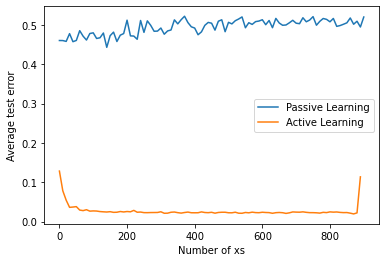

In [85]:
plt.figure()
plt.plot(df100.index*10, df100['mean50'], label = "Passive Learning")
plt.plot(df110.index*10, df110['mean50'], label = "Active Learning")
plt.xlabel('Number of xs')
plt.ylabel('Average test error')
plt.legend()

# Reference:
    https://stackoverflow.com/questions/48641632/extracting-specific-columns-from-pandas-dataframe
    
    https://stackoverflow.com/questions/21660937/get-nearest-point-to-centroid-scikit-learn
    
    https://stackoverflow.com/questions/53790832/how-to-get-n-numbers-of-data-points-which-are-nearest-from-a-clusters-center
    
    https://stackoverflow.com/questions/36195457/how-to-get-the-samples-in-each-cluster
    
    https://stackoverflow.com/questions/55749114/how-to-do-a-majority-voting-on-columns-in-pandas
    
    https://stackoverflow.com/questions/27275236/pandas-best-way-to-select-all-columns-whose-names-start-with-x